ValueError: unknown file extension: .mp4

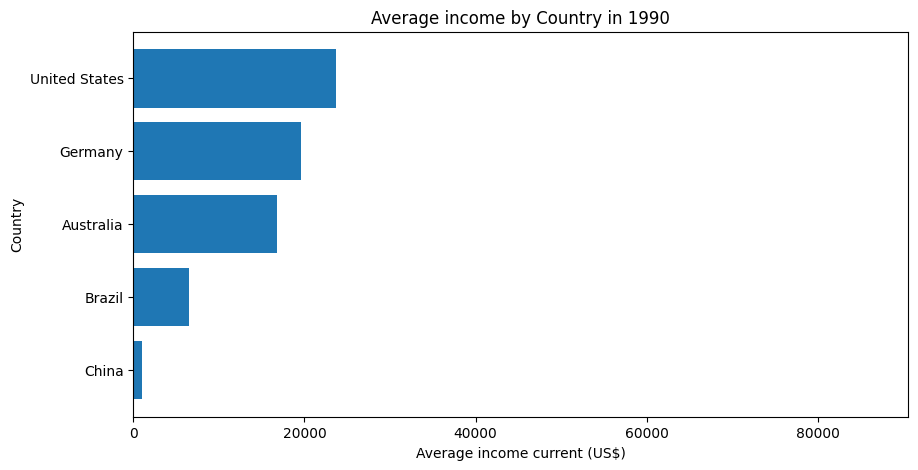

In [6]:
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import wbdata
import requests
import pandas as pd
from datetime import datetime


country_codes_requested = ["USA", "DEU", "CHN", "AUS", "NGA", "BRA"]
all_data = []
for country in country_codes_requested:
    country_url = f"https://api.worldbank.org/v2/country/{country}/indicator/NY.GNP.PCAP.PP.CD?format=json"
    response = requests.get(country_url).json()
    if len(response) > 1 and response[1] is not None:
        all_data.extend(response[1])

df = pd.DataFrame(all_data)



# Keep only relevant columns
df = df[['country', 'countryiso3code', 'date', 'value']]

# Convert 'country' column from a dictionary to a string
df['country'] = df['country'].apply(lambda x: x['value'] if isinstance(x, dict) else x)

# Drop rows with missing GNI values
df = df.dropna(subset=['value'])
df = df.drop(columns=['countryiso3code'])
# Convert 'date' to an integer
df['date'] = df['date'].astype(int)
df['value'] = df['value'].astype(int)


df.rename(columns={"country": "Country"}, inplace=True)
df.rename(columns={"date": "Years"}, inplace=True)
df.rename(columns={"value": "Population"}, inplace=True)
# Sort by country and year
df = df.sort_values(by=['Country', 'Years'])


# Sort years for animation frames
years = sorted(df['Years'].unique())

# Create figure and axis
fig, ax = plt.subplots(figsize=(10, 5))

def update(year):
    ax.clear()
    df_year = df[df['Years'] == year].sort_values(by='Population', ascending=True)  # Sort for better visualization
    
    df_year['Population'] = df_year['Population'] 
   
    ax.barh(df_year['Country'], df_year['Population'])  # Horizontal bar chart
    ax.set_xlabel('Average income current (US$)')
    ax.set_ylabel('Country')
    ax.set_title(f'Average income by Country in {year}')
    ax.set_xlim(0, df['Population'].max() * 1.1000000)  # Set consistent x-axis range for clarity
       # Format x-axis to force numbers to show in millions
    ax.ticklabel_format(axis='x', style='plain')
# Create animation
ani = animation.FuncAnimation(fig, update, frames=years, interval=1000, repeat=True)

# Save as MP4 file
ani.save('income6.mp4', writer='ffmpeg', fps=4)